# Project: Wrangling and Analyze Data

In [1]:
import numpy as np
import pandas as pd
import os
import requests
import json
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
twitter_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [4]:
twitter_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
twitter_enhanced.query('name == "Tilly"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
twitter_enhanced.name.nunique()

957

In [7]:
twitter_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
tweet_image_request = requests.get("https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv")

In [9]:
print(tweet_image_request) # Checking that the response is good

<Response [200]>


In [10]:
# writing the "image_predictions.csv" file
with open("image_predictions.csv", mode = 'wb') as file:
    file.write(tweet_image_request.content)

In [11]:
df_image_predictions = pd.read_csv('image_predictions.csv', sep='\t')

In [12]:
df_image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [13]:
df_image_predictions.query('p1_dog == False').sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
390,673363615379013632,https://pbs.twimg.com/media/CVhEoq4WcAE8pBm.jpg,1,ox,0.193431,False,warthog,0.123827,False,bison,0.111177,False
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False
226,670361874861563904,https://pbs.twimg.com/media/CU2akCQWsAIbaOV.jpg,1,platypus,0.974075,False,spotted_salamander,0.011068,False,bison,0.003897,False
827,693486665285931008,https://pbs.twimg.com/ext_tw_video_thumb/69348...,1,sea_lion,0.519811,False,Siamese_cat,0.290971,False,black-footed_ferret,0.039967,False
515,676263575653122048,https://pbs.twimg.com/media/CWKSIfUUYAAiOBO.jpg,1,teddy,0.098283,False,toy_poodle,0.098029,True,shopping_basket,0.077852,False
1676,813172488309972993,https://pbs.twimg.com/media/C0j4EESUsAABtMq.jpg,1,doormat,0.954844,False,golden_retriever,0.026193,True,cocker_spaniel,0.004386,True
1320,756288534030475264,https://pbs.twimg.com/media/Cn7gaHrWIAAZJMt.jpg,3,conch,0.925621,False,French_bulldog,0.032492,True,tiger_cat,0.006679,False
1342,758854675097526272,https://pbs.twimg.com/media/Cof-SuqVYAAs4kZ.jpg,4,barrow,0.974047,False,Old_English_sheepdog,0.023791,True,komondor,0.001246,True
911,700796979434098688,https://pbs.twimg.com/media/Cbm7IeUXIAA6Lc-.jpg,1,tailed_frog,0.652712,False,tree_frog,0.280212,False,bullfrog,0.040177,False
232,670417414769758208,https://pbs.twimg.com/media/CU3NE8EWUAEVdPD.jpg,1,sea_urchin,0.493257,False,porcupine,0.460565,False,cardoon,0.008146,False


In [14]:
df_image_predictions.query('p1_dog == False or p2_dog == False or p3_dog == False').count()[0]

832

In [15]:
df_image_predictions.query('p1_dog == False').count()[0]

543

In [16]:
df_image_predictions.query('p2_dog == False').count()[0]

522

In [17]:
df_image_predictions.query('p3_dog == False').count()[0]

576

In [18]:
df_image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

### Reference
https://knowledge.udacity.com/questions/94203

In [19]:
selected_attr = []

with open('tweet-json.txt', 'r') as json_file:
    for line in json_file:
        json_data = json.loads(line)
        selected_attr.append({'tweet_id':json_data['id_str'],
                              'retweet_status':json_data['retweeted'],
                              'retweets': json_data['retweet_count'],
                              'favourites':json_data['favorite_count']
        }
        )

tweet_json = pd.DataFrame(selected_attr, columns = ['tweet_id',
                                                   'retweet_status',
                                                   'retweets',
                                                   'favourites'])

In [20]:
tweet_json.head()

,tweet_id,retweet_status,retweets,favourites
0,892420643555336193,False,8853,39467
1,892177421306343426,False,6514,33819
2,891815181378084864,False,4328,25461
3,891689557279858688,False,8964,42908
4,891327558926688256,False,9774,41048


In [21]:
tweet_json.query('retweet_status == False').count()

tweet_id          2354
retweet_status    2354
retweets          2354
favourites        2354
dtype: int64

In [22]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_status  2354 non-null   bool  
 2   retweets        2354 non-null   int64 
 3   favourites      2354 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 57.6+ KB


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### Quality issues

#### 'twitter-archive-enhanced.csv'
1. Ignoring retweets by keeping twitter_enhanced, retweeted_status_id == NaN

1. One url is enough instead of two

2. Timestamp is an object instead of type date time

3. 745 names are None and articles a, an, the are used as dog's name. Dropping the name column

#### 'image-predictions.csv'

5. 832 are not dogs. 543 p1_dog are not dogs

6. Dropping the img_num column

#### 'tweet-json.txt'

7. Selecting only the necessary columns from tweet_id, retweet_status, retweets, favourites


8. Convert the id type from int to string in 'twitter-archive-enhanced.csv' and 'image-predictions.csv'


### Tidiness issues
1. In 'twitter-archive-enhanced' values (doggo, floofer, pupper, puppo) are stored as variable

2. In 'twitter-archive-enhanced' creating a new field. rating = rating_numerator / rating_denominator. In some cases rating_denominator is more than 10. Rating denominator is not a constant.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [23]:
# Make copies of original pieces of data
twitter_enhanced_clean = twitter_enhanced.copy()

In [24]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [25]:
image_predictions_clean = df_image_predictions.copy()


In [26]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [27]:
tweet_json_clean = tweet_json.copy()

In [28]:
tweet_json_clean.head()

,tweet_id,retweet_status,retweets,favourites
0,892420643555336193,False,8853,39467
1,892177421306343426,False,6514,33819
2,891815181378084864,False,4328,25461
3,891689557279858688,False,8964,42908
4,891327558926688256,False,9774,41048


### Issue #1:

#### Define: 

Ignoring retweets by keeping twitter_enhanced, retweeted_status_id == NaN

#### Code

In [29]:
twitter_enhanced_clean.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [30]:
twitter_enhanced_clean.query('retweeted_status_id != "NaN"').count()[0]

2356

In [31]:
twitter_enhanced_clean.retweeted_status_id.value_counts()

8.874740e+17    1
6.704450e+17    1
6.671828e+17    1
6.661041e+17    1
7.717705e+17    1
               ..
7.950767e+17    1
7.840579e+17    1
8.222448e+17    1
8.224891e+17    1
6.675484e+17    1
Name: retweeted_status_id, Length: 181, dtype: int64

In [32]:
twitter_enhanced_clean = twitter_enhanced_clean[twitter_enhanced_clean['retweeted_status_id'].isna()]

#### Test

In [33]:
twitter_enhanced.shape

(2356, 17)

In [34]:
twitter_enhanced_clean.shape

(2175, 17)

In [35]:
2356 - 181

2175

### Issue #2:

#### Define

One url is enough instead of two

#### Code

In [36]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [37]:
## Removing the source but keeping the 'expanded_urls'

In [38]:
twitter_enhanced_clean = twitter_enhanced_clean.drop('source', axis=1)

#### Test

In [39]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


### Issue 3

#### Define

Timestamp is an object instead of type date time

#### Code

In [40]:
twitter_enhanced_clean['timestamp'] = pd.to_datetime(twitter_enhanced_clean['timestamp'])

#### Test

In [41]:
twitter_enhanced_clean.timestamp.head()

0   2017-08-01 16:23:56+00:00
1   2017-08-01 00:17:27+00:00
2   2017-07-31 00:18:03+00:00
3   2017-07-30 15:58:51+00:00
4   2017-07-29 16:00:24+00:00
Name: timestamp, dtype: datetime64[ns, UTC]

### Issue 4

#### Define

745 names are None and articles a, an, the are used as dog's name. Dropping the name column

#### Code

In [42]:
twitter_enhanced_clean = twitter_enhanced_clean.drop('name', axis = 1)

#### Test

In [43]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,None,None,None,None


In [44]:
twitter_enhanced_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue 5

#### Define

832 are not dogs. 543 p1_dog are not dogs

#### Code

In [45]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [46]:
image_predictions_clean.query('p1_dog == False').count()[0]

543

In [47]:
image_predictions_clean.query('p1_dog == False or p2_dog == False or p3_dog == False').count()[0]

832

In [48]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [49]:
image_predictions_clean.shape

(2075, 12)

In [50]:
image_predictions_clean.query('p1_dog == True and p2_dog == True and p3_dog == True').count()[0]

1243

In [51]:
2075 - 1243

832

In [52]:
image_predictions_clean.query('p1_dog == True and p2_dog == True and p3_dog == True').head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [53]:
image_predictions_clean.query('p1_dog == True and p2_dog == True and p3_dog == True').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1243 non-null   int64  
 1   jpg_url   1243 non-null   object 
 2   img_num   1243 non-null   int64  
 3   p1        1243 non-null   object 
 4   p1_conf   1243 non-null   float64
 5   p1_dog    1243 non-null   bool   
 6   p2        1243 non-null   object 
 7   p2_conf   1243 non-null   float64
 8   p2_dog    1243 non-null   bool   
 9   p3        1243 non-null   object 
 10  p3_conf   1243 non-null   float64
 11  p3_dog    1243 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


#### Test

In [54]:
image_predictions_clean = image_predictions_clean.query('p1_dog == True and p2_dog == True and p3_dog == True')

In [55]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1243 non-null   int64  
 1   jpg_url   1243 non-null   object 
 2   img_num   1243 non-null   int64  
 3   p1        1243 non-null   object 
 4   p1_conf   1243 non-null   float64
 5   p1_dog    1243 non-null   bool   
 6   p2        1243 non-null   object 
 7   p2_conf   1243 non-null   float64
 8   p2_dog    1243 non-null   bool   
 9   p3        1243 non-null   object 
 10  p3_conf   1243 non-null   float64
 11  p3_dog    1243 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 100.8+ KB


### Issue 6

#### Define

Dropping the img_num column

#### Code

In [56]:
image_predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [57]:
image_predictions_clean = image_predictions_clean.drop('img_num', axis=1)

#### Test

In [58]:
image_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### Issue 7

#### Define

Selecting only the necessary columns from tweet_id, retweet_status, retweets, favourites

#### Code

In [59]:
## Have already selected the necessary columns
tweet_json_clean.head()

,tweet_id,retweet_status,retweets,favourites
0,892420643555336193,False,8853,39467
1,892177421306343426,False,6514,33819
2,891815181378084864,False,4328,25461
3,891689557279858688,False,8964,42908
4,891327558926688256,False,9774,41048


#### Test

In [60]:
tweet_json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_status  2354 non-null   bool  
 2   retweets        2354 non-null   int64 
 3   favourites      2354 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 57.6+ KB


### Issue 8

#### Define

Convert the id type from int to string in 'twitter-archive-enhanced.csv' and 'image-predictions.csv'

#### Code

In [61]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   text                        2175 non-null   object             
 5   retweeted_status_id         0 non-null      float64            
 6   retweeted_status_user_id    0 non-null      float64            
 7   retweeted_status_timestamp  0 non-null      object             
 8   expanded_urls               2117 non-null   object             
 9   rating_numerator            2175 non-null   int64              
 10  rating_denominator          2175 non-null   int64           

In [62]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1243 non-null   int64  
 1   jpg_url   1243 non-null   object 
 2   p1        1243 non-null   object 
 3   p1_conf   1243 non-null   float64
 4   p1_dog    1243 non-null   bool   
 5   p2        1243 non-null   object 
 6   p2_conf   1243 non-null   float64
 7   p2_dog    1243 non-null   bool   
 8   p3        1243 non-null   object 
 9   p3_conf   1243 non-null   float64
 10  p3_dog    1243 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 91.0+ KB


In [63]:
twitter_enhanced_clean['tweet_id'] = twitter_enhanced_clean['tweet_id'].astype(str)

In [64]:
image_predictions_clean['tweet_id'] = image_predictions_clean['tweet_id'].astype(str)

#### Test

In [65]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,None,None,None,None


In [66]:
twitter_enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   text                        2175 non-null   object             
 5   retweeted_status_id         0 non-null      float64            
 6   retweeted_status_user_id    0 non-null      float64            
 7   retweeted_status_timestamp  0 non-null      object             
 8   expanded_urls               2117 non-null   object             
 9   rating_numerator            2175 non-null   int64              
 10  rating_denominator          2175 non-null   int64           

In [67]:
image_predictions_clean.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [68]:
image_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1243 non-null   object 
 1   jpg_url   1243 non-null   object 
 2   p1        1243 non-null   object 
 3   p1_conf   1243 non-null   float64
 4   p1_dog    1243 non-null   bool   
 5   p2        1243 non-null   object 
 6   p2_conf   1243 non-null   float64
 7   p2_dog    1243 non-null   bool   
 8   p3        1243 non-null   object 
 9   p3_conf   1243 non-null   float64
 10  p3_dog    1243 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 91.0+ KB


In [69]:
image_predictions_clean.p1.value_counts()

golden_retriever       126
Pembroke                78
Labrador_retriever      77
Chihuahua               54
pug                     41
                      ... 
Appenzeller              1
standard_schnauzer       1
Scotch_terrier           1
EntleBucher              1
Irish_water_spaniel      1
Name: p1, Length: 110, dtype: int64

### Issue 9 : Tidiness Issue

#### Define

In 'twitter-archive-enhanced' values (doggo, floofer, pupper, puppo) are stored as variable

#### Code

In [70]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,None,None,None,None


In [71]:
twitter_enhanced_clean['dog_stages'] = twitter_enhanced_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand= True)

In [72]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,None,None,None,None,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,None,None,None,None,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,None,None,None,None,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,None,None,None,None,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,None,None,None,None,NaN


In [73]:
twitter_enhanced_clean = twitter_enhanced_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

#### Test

In [74]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_stages
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN


### Issue 10: Tidiness Issue

#### Define

In 'twitter-archive-enhanced' creating a new field. rating = rating_numerator / rating_denominator. In some cases rating_denominator is more than 10. Rating denominator is not a constant.

#### Code

In [75]:
twitter_enhanced_clean.rating_numerator.min()

0

In [76]:
twitter_enhanced_clean.rating_numerator.max()

1776

In [77]:
twitter_enhanced_clean.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_stages
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,NaN


In [78]:
twitter_enhanced_clean.rating_numerator.mean()

13.215172413793104

In [79]:
twitter_enhanced_clean.query('rating_numerator > 13')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_stages
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,doggo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,NaN
35,885518971528720385,NaN,NaN,2017-07-13 15:19:09+00:00,I have a new hero and his name is Howard. 14/1...,NaN,NaN,NaN,https://twitter.com/4bonds2carbon/status/88551...,14,10,NaN
41,884441805382717440,NaN,NaN,2017-07-10 15:58:53+00:00,"I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/884441805...,14,10,NaN
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53+00:00,@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03+00:00,"I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,NaN
1712,680494726643068929,NaN,NaN,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/680494726...,26,10,pupper
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23+00:00,IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,NaN
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41+00:00,Here we have an entire platoon of puppers. Tot...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675853064...,88,80,pupper


In [80]:
twitter_enhanced_clean.rating_numerator.median()

11.0

In [81]:
twitter_enhanced_clean.rating_denominator.median()

10.0

In [82]:
twitter_enhanced_clean.rating_denominator.min()

0

In [83]:
twitter_enhanced_clean.rating_denominator.max()

170

In [84]:
twitter_enhanced_clean['rating'] = twitter_enhanced_clean['rating_numerator'] / twitter_enhanced_clean['rating_denominator']

#### Test

In [85]:
twitter_enhanced_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_stages,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,1.2


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

#### Reference

https://knowledge.udacity.com/questions/173587

In [86]:
twitter_enhanced_store = twitter_enhanced_clean.copy()

In [87]:
image_predictions_store = image_predictions_clean.copy()

In [88]:
tweet_json_store = tweet_json_clean.copy()

In [89]:
twitter_enhanced_store.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,dog_stages,rating
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,1.2


In [90]:
twitter_enhanced_store = twitter_enhanced_store.drop(['in_reply_to_status_id',
                                                     'in_reply_to_user_id',
                                                     'retweeted_status_id',
                                                     'retweeted_status_user_id',
                                                     'retweeted_status_timestamp'], axis=1)

In [91]:
twitter_enhanced_store.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,rating
0,892420643555336193,2017-08-01 16:23:56+00:00,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,NaN,1.3
1,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,1.3
2,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,1.2
3,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,NaN,1.3
4,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,1.2


In [92]:
twitter_enhanced_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2175 non-null   object             
 1   timestamp           2175 non-null   datetime64[ns, UTC]
 2   text                2175 non-null   object             
 3   expanded_urls       2117 non-null   object             
 4   rating_numerator    2175 non-null   int64              
 5   rating_denominator  2175 non-null   int64              
 6   dog_stages          364 non-null    object             
 7   rating              2175 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(1), int64(2), object(4)
memory usage: 152.9+ KB


In [93]:
image_predictions_store.head()

,tweet_id,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [94]:
image_predictions_store['p1_dog'].value_counts()

True    1243
Name: p1_dog, dtype: int64

The image_predictions_clean and image_predictions_store contain only True. So removing p1_conf, p2_conf, p3_conf, p1_dog, p2_dog, p3_dog

Keeping tweet_id, jpg_url, p1, p2, p3. Removing less useful columns before making the final dataframe.

In [95]:
image_predictions_store['p2_dog'].value_counts()

True    1243
Name: p2_dog, dtype: int64

In [96]:
image_predictions_store['p3_dog'].value_counts()

True    1243
Name: p3_dog, dtype: int64

In [97]:
image_predictions_store.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1243 entries, 0 to 2073
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1243 non-null   object 
 1   jpg_url   1243 non-null   object 
 2   p1        1243 non-null   object 
 3   p1_conf   1243 non-null   float64
 4   p1_dog    1243 non-null   bool   
 5   p2        1243 non-null   object 
 6   p2_conf   1243 non-null   float64
 7   p2_dog    1243 non-null   bool   
 8   p3        1243 non-null   object 
 9   p3_conf   1243 non-null   float64
 10  p3_dog    1243 non-null   bool   
dtypes: bool(3), float64(3), object(5)
memory usage: 91.0+ KB


In [98]:
image_predictions_store = image_predictions_store.drop(['p1_conf', 'p1_dog', 'p2_conf', 'p2_dog', 
                                                        'p3_conf', 'p3_dog'], axis=1)

In [99]:
image_predictions_store.head()

,tweet_id,jpg_url,p1,p2,p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,collie,Shetland_sheepdog
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,miniature_pinscher,Rhodesian_ridgeback
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,malinois,bloodhound
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,redbone,miniature_pinscher
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,Rottweiler,Doberman


In [100]:
tweet_json_store.head()

,tweet_id,retweet_status,retweets,favourites
0,892420643555336193,False,8853,39467
1,892177421306343426,False,6514,33819
2,891815181378084864,False,4328,25461
3,891689557279858688,False,8964,42908
4,891327558926688256,False,9774,41048


In [101]:
tweet_json_store.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_status  2354 non-null   bool  
 2   retweets        2354 non-null   int64 
 3   favourites      2354 non-null   int64 
dtypes: bool(1), int64(2), object(1)
memory usage: 57.6+ KB


In [102]:
twitter_archive = pd.merge(twitter_enhanced_store, image_predictions_store, how = 'inner', on = 'tweet_id')

In [103]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1203 non-null   object             
 1   timestamp           1203 non-null   datetime64[ns, UTC]
 2   text                1203 non-null   object             
 3   expanded_urls       1203 non-null   object             
 4   rating_numerator    1203 non-null   int64              
 5   rating_denominator  1203 non-null   int64              
 6   dog_stages          201 non-null    object             
 7   rating              1203 non-null   float64            
 8   jpg_url             1203 non-null   object             
 9   p1                  1203 non-null   object             
 10  p2                  1203 non-null   object             
 11  p3                  1203 non-null   object             
dtypes: datetime64[ns, UTC](1), float64

In [104]:
twitter_archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,rating,jpg_url,p1,p2,p3
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,English_springer,German_short-haired_pointer
3,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,Eskimo_dog,Pembroke
4,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever


In [105]:
twitter_archive_master = pd.merge(twitter_archive, tweet_json_store, how = 'inner', on = 'tweet_id')

In [106]:
twitter_archive_master.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,rating,jpg_url,p1,p2,p3,retweet_status,retweets,favourites
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,False,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie,False,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,English_springer,German_short-haired_pointer,False,9774,41048
3,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,Eskimo_dog,Pembroke,False,16716,56848
4,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,False,4429,28226


In [107]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1203 entries, 0 to 1202
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1203 non-null   object             
 1   timestamp           1203 non-null   datetime64[ns, UTC]
 2   text                1203 non-null   object             
 3   expanded_urls       1203 non-null   object             
 4   rating_numerator    1203 non-null   int64              
 5   rating_denominator  1203 non-null   int64              
 6   dog_stages          201 non-null    object             
 7   rating              1203 non-null   float64            
 8   jpg_url             1203 non-null   object             
 9   p1                  1203 non-null   object             
 10  p2                  1203 non-null   object             
 11  p3                  1203 non-null   object             
 12  retweet_status      1203 non-null 

In [108]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

In [109]:
df_test = pd.read_csv('twitter_archive_master.csv')

In [110]:
df_test.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,rating,jpg_url,p1,p2,p3,retweet_status,retweets,favourites
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,False,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie,False,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,English_springer,German_short-haired_pointer,False,9774,41048
3,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,Eskimo_dog,Pembroke,False,16716,56848
4,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,False,4429,28226


In [111]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   tweet_id            1203 non-null   int64  
 1   timestamp           1203 non-null   object 
 2   text                1203 non-null   object 
 3   expanded_urls       1203 non-null   object 
 4   rating_numerator    1203 non-null   int64  
 5   rating_denominator  1203 non-null   int64  
 6   dog_stages          201 non-null    object 
 7   rating              1203 non-null   float64
 8   jpg_url             1203 non-null   object 
 9   p1                  1203 non-null   object 
 10  p2                  1203 non-null   object 
 11  p3                  1203 non-null   object 
 12  retweet_status      1203 non-null   bool   
 13  retweets            1203 non-null   int64  
 14  favourites          1203 non-null   int64  
dtypes: bool(1), float64(1), int64(5), object(8)
memory usag

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [112]:
df_test.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,dog_stages,rating,jpg_url,p1,p2,p3,retweet_status,retweets,favourites
0,892177421306343426,2017-08-01 00:17:27+00:00,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,Pekinese,papillon,False,6514,33819
1,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,malamute,kelpie,False,4328,25461
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,English_springer,German_short-haired_pointer,False,9774,41048
3,890729181411237888,2017-07-28 00:22:40+00:00,When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,Eskimo_dog,Pembroke,False,16716,56848
4,890609185150312448,2017-07-27 16:25:51+00:00,This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,13,10,NaN,1.3,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,Irish_setter,Chesapeake_Bay_retriever,False,4429,28226


### Insights:
1. Top 5 dog breeds as per p1

2. The relationship between rating and retweets

3. The relationship between retweets and favourites

4. The rating denominator is not a constant value of 10

In [113]:
df_test.p1.value_counts()

golden_retriever           119
Pembroke                    77
Labrador_retriever          75
Chihuahua                   50
pug                         39
                          ... 
groenendael                  1
Appenzeller                  1
clumber                      1
wire-haired_fox_terrier      1
Irish_water_spaniel          1
Name: p1, Length: 110, dtype: int64

In [114]:
df_test.rating.max()

3.4285714285714284

In [115]:
df_test.rating.min()

0.2

#### 1. The top 5 dog breeds as per p1 are

golden_retriever 119 <br>
pembroke 77 <br>
Labrador_retriever 75 <br>
Chihuahua 50 <br>
pug       39

#### 2. The co relation between rating and retweets are not strong
#### 3. The co relation between rating retweets and favourites are not strong
#### 4. The maximum rating is 3.43 and the minimum rating is 0.20

### Visualization

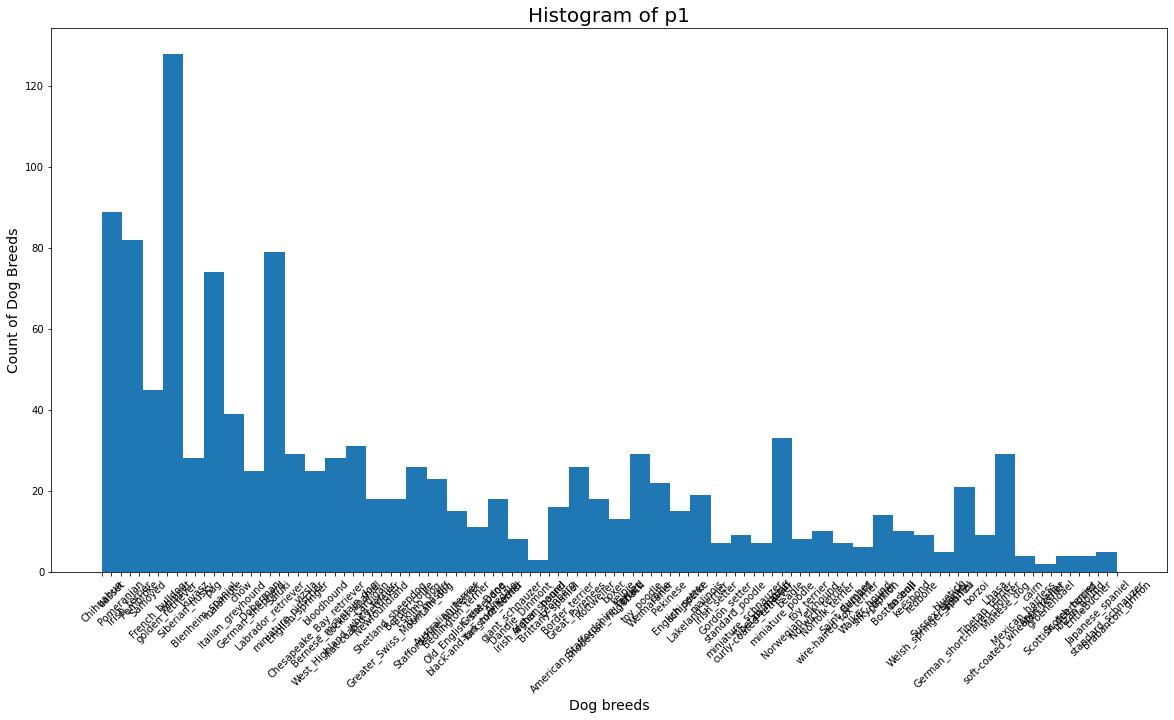

In [116]:
### Histogram of dog breeds

plt.figure(figsize = (20, 10))
plt.title('Histogram of p1', fontsize = 20)
plt.xlabel('Dog breeds', fontsize = 14)
plt.ylabel('Count of Dog Breeds', fontsize = 14)
plt.hist(df_test.p1, bins =50)
plt.xticks(rotation = 45);

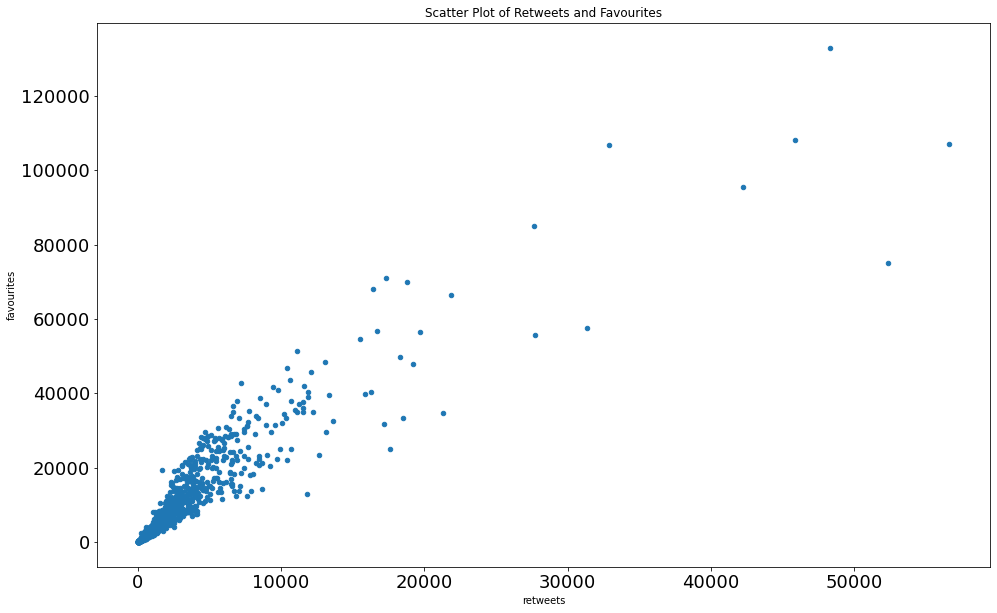

In [117]:
df_test.plot(kind = 'scatter', x = 'retweets', y = 'favourites', figsize = (16, 10), fontsize = 18, title = 'Scatter Plot of Retweets and Favourites');

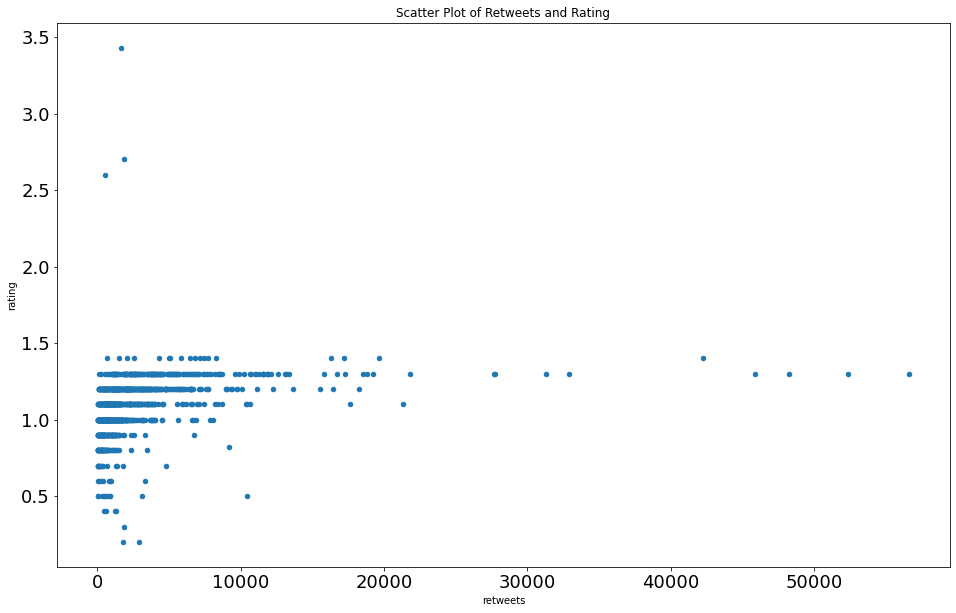

In [118]:
df_test.plot(kind = 'scatter', x = 'retweets', y = 'rating', figsize = (16, 10), fontsize = 18, title = 'Scatter Plot of Retweets and Rating');